# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [ ]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [ ]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [17]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [18]:
# 先篩選數值型的欄位
dtype_select = []
dtype_select = [np.dtype('int64'), np.dtype('float64')]
dtype_select


[dtype('int64'), dtype('float64')]

In [19]:
#Column比對符合數值型別條件的結果回傳成list
validList = list(app_train.dtypes.isin(dtype_select))

In [20]:
#?app_train.dtypes.isin
#Check whether `values` are contained in Series.
#
#Return a boolean Series showing whether each element in the Series
#matches an element in the passed sequence of `values` exactly.

In [21]:
#篩選出的數值型欄位資料
numeric_columns = list(app_train.columns[validList])

In [22]:
len(numeric_columns)

106

In [23]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
condition = list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))

In [24]:
# 取得符合的欄位數
numeric_columns = list(app_train[numeric_columns].columns[condition])
print("Numbers of remain columns: %s" % len(numeric_columns))
##print(numeric_columns)

Numbers of remain columns: 73


In [30]:
# 如果不想要每次在jupyter notebook顯示都寫.show()
# 可以在jupyter notebook加上%matplotlib inline
%matplotlib inline

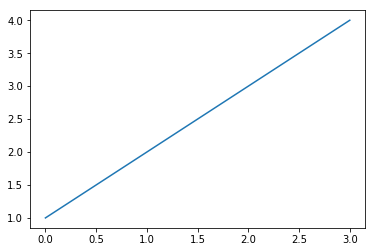

In [31]:
# Test
plt.plot([1,2,3,4])

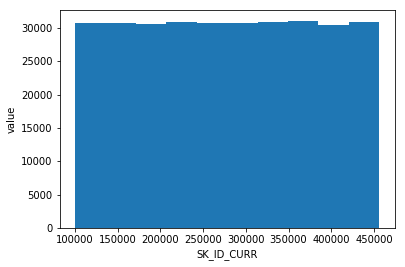

Column: SK_ID_CURR from Min: 100002, Max: 456255


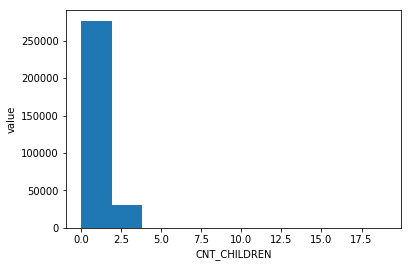

Column: CNT_CHILDREN from Min: 0, Max: 19


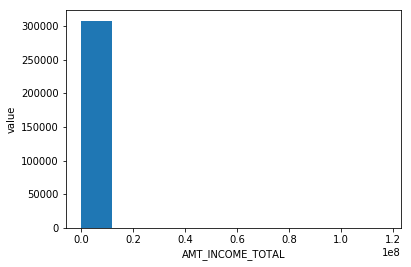

Column: AMT_INCOME_TOTAL from Min: 25650, Max: 117000000


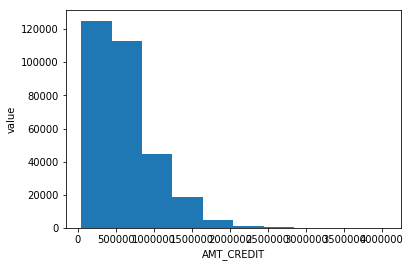

Column: AMT_CREDIT from Min: 45000, Max: 4050000


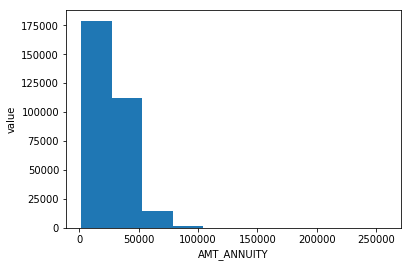

Column: AMT_ANNUITY from Min: 1616, Max: 258026


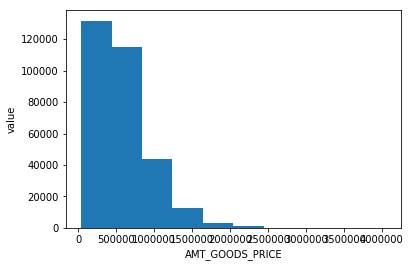

Column: AMT_GOODS_PRICE from Min: 40500, Max: 4050000


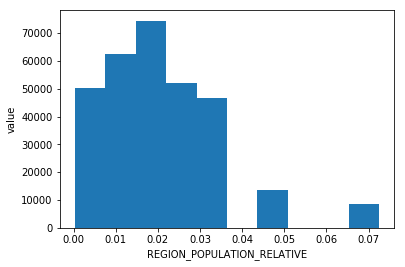

Column: REGION_POPULATION_RELATIVE from Min: 0, Max: 0


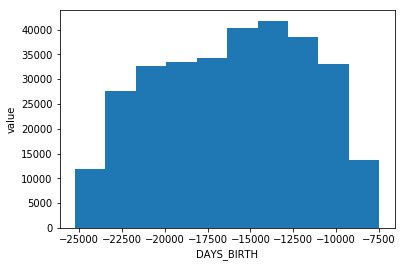

Column: DAYS_BIRTH from Min: -25229, Max: -7489


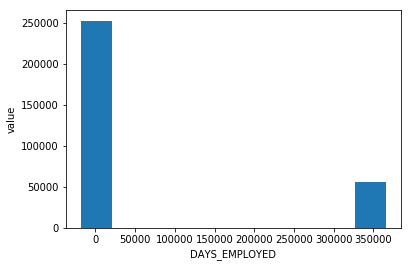

Column: DAYS_EMPLOYED from Min: -17912, Max: 365243


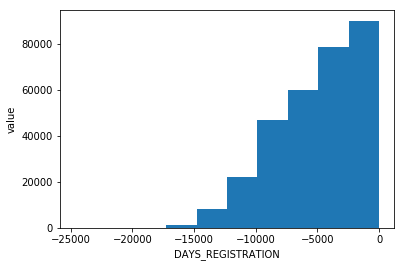

Column: DAYS_REGISTRATION from Min: -24672, Max: 0


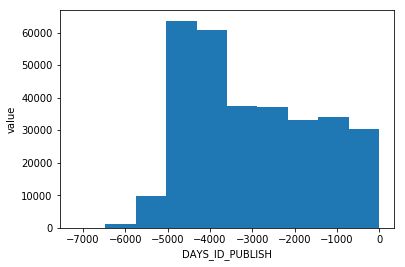

Column: DAYS_ID_PUBLISH from Min: -7197, Max: 0


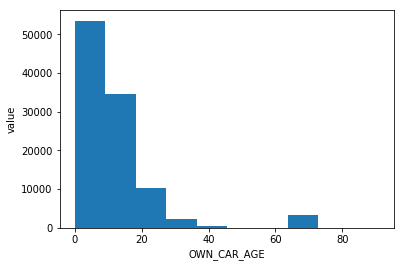

Column: OWN_CAR_AGE from Min: 0, Max: 91


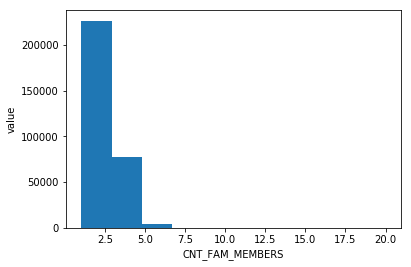

Column: CNT_FAM_MEMBERS from Min: 1, Max: 20


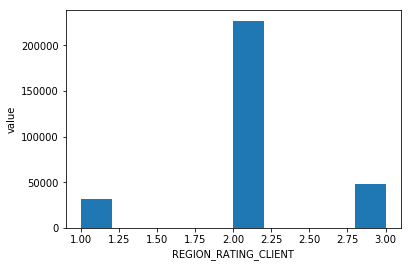

Column: REGION_RATING_CLIENT from Min: 1, Max: 3


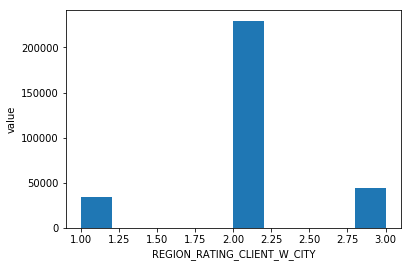

Column: REGION_RATING_CLIENT_W_CITY from Min: 1, Max: 3


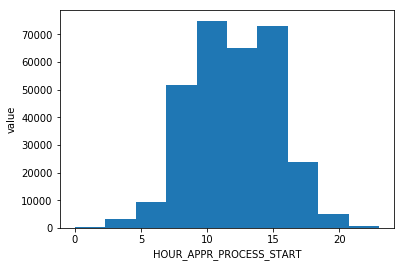

Column: HOUR_APPR_PROCESS_START from Min: 0, Max: 23


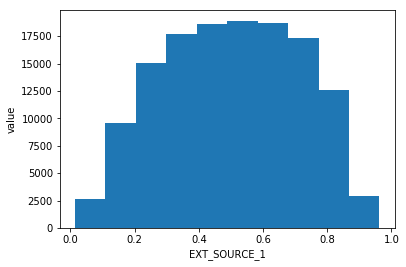

Column: EXT_SOURCE_1 from Min: 0, Max: 1


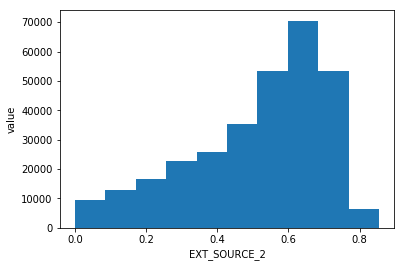

Column: EXT_SOURCE_2 from Min: 0, Max: 1


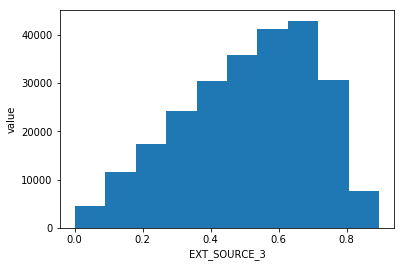

Column: EXT_SOURCE_3 from Min: 0, Max: 1


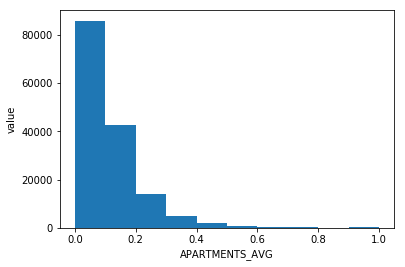

Column: APARTMENTS_AVG from Min: 0, Max: 1


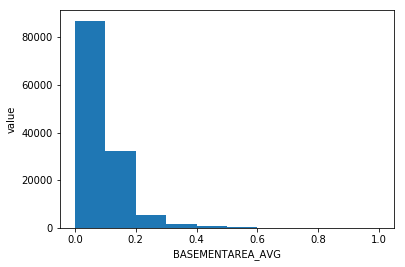

Column: BASEMENTAREA_AVG from Min: 0, Max: 1


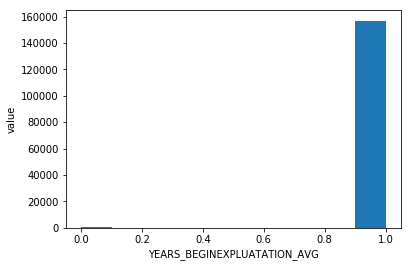

Column: YEARS_BEGINEXPLUATATION_AVG from Min: 0, Max: 1


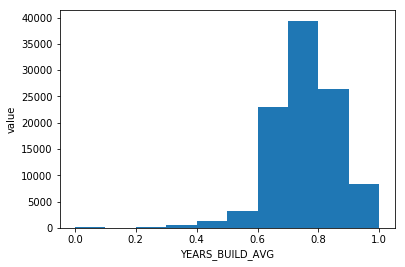

Column: YEARS_BUILD_AVG from Min: 0, Max: 1


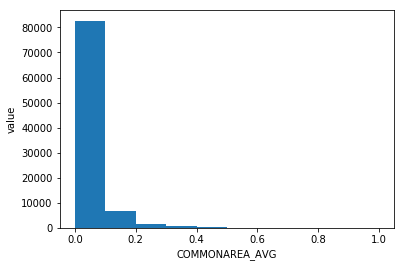

Column: COMMONAREA_AVG from Min: 0, Max: 1


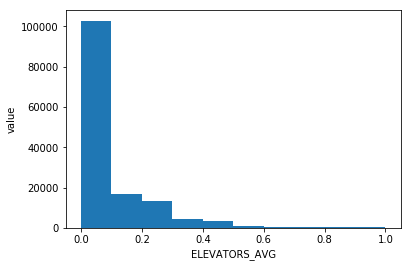

Column: ELEVATORS_AVG from Min: 0, Max: 1


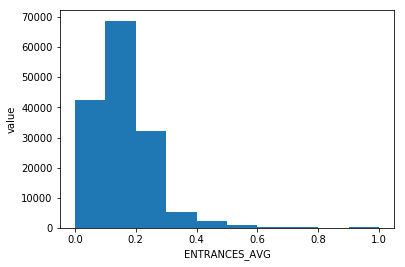

Column: ENTRANCES_AVG from Min: 0, Max: 1


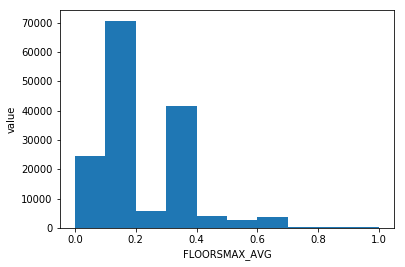

Column: FLOORSMAX_AVG from Min: 0, Max: 1


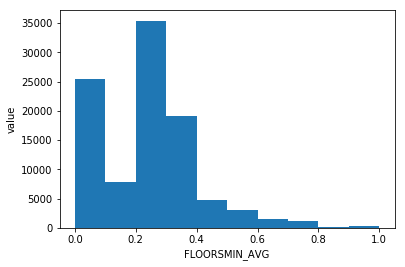

Column: FLOORSMIN_AVG from Min: 0, Max: 1


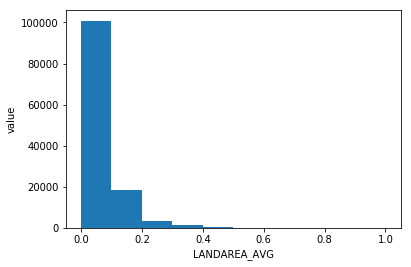

Column: LANDAREA_AVG from Min: 0, Max: 1


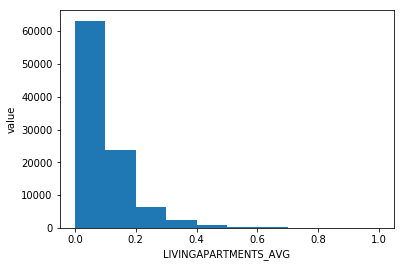

Column: LIVINGAPARTMENTS_AVG from Min: 0, Max: 1


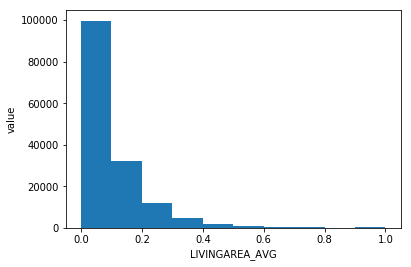

Column: LIVINGAREA_AVG from Min: 0, Max: 1


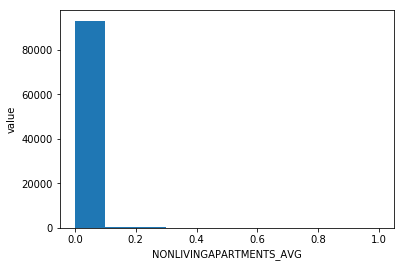

Column: NONLIVINGAPARTMENTS_AVG from Min: 0, Max: 1


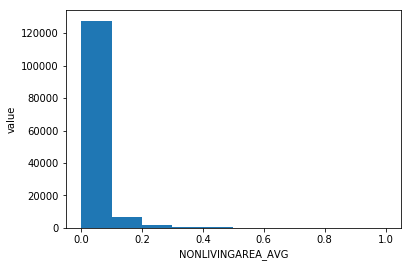

Column: NONLIVINGAREA_AVG from Min: 0, Max: 1


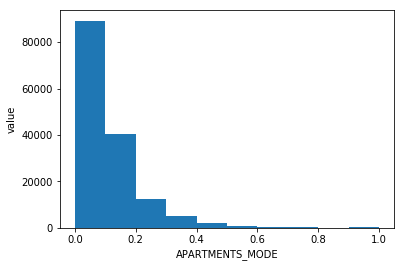

Column: APARTMENTS_MODE from Min: 0, Max: 1


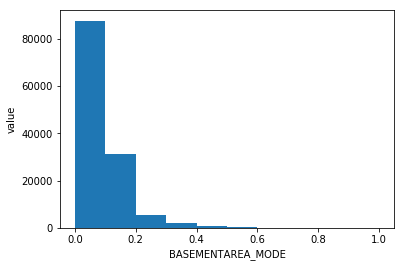

Column: BASEMENTAREA_MODE from Min: 0, Max: 1


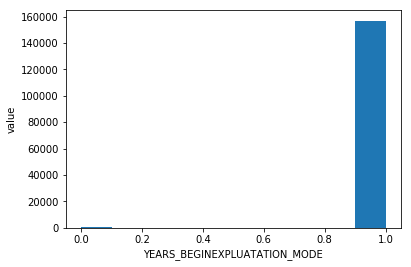

Column: YEARS_BEGINEXPLUATATION_MODE from Min: 0, Max: 1


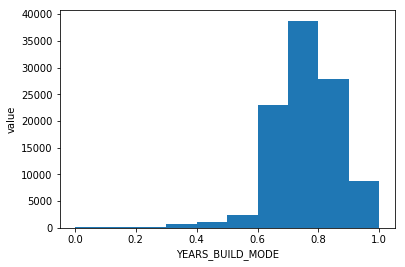

Column: YEARS_BUILD_MODE from Min: 0, Max: 1


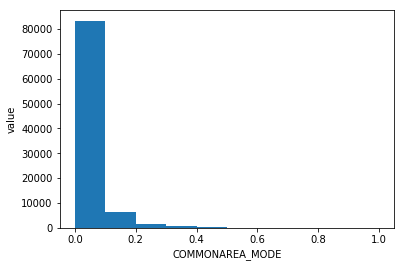

Column: COMMONAREA_MODE from Min: 0, Max: 1


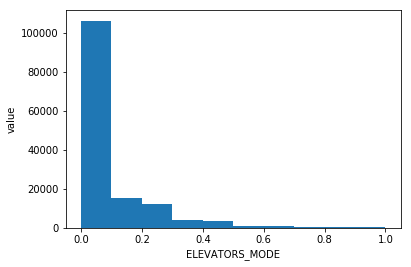

Column: ELEVATORS_MODE from Min: 0, Max: 1


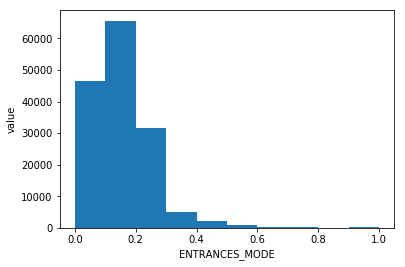

Column: ENTRANCES_MODE from Min: 0, Max: 1


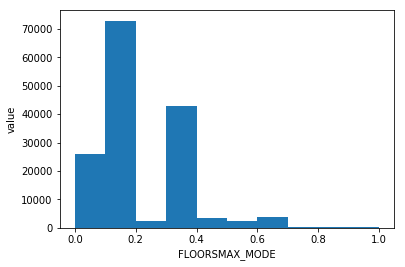

Column: FLOORSMAX_MODE from Min: 0, Max: 1


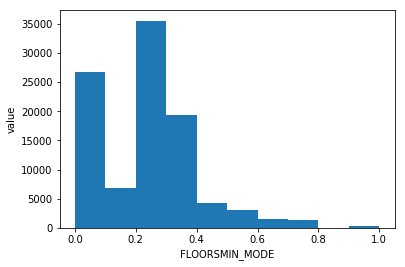

Column: FLOORSMIN_MODE from Min: 0, Max: 1


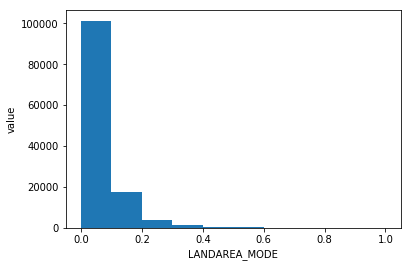

Column: LANDAREA_MODE from Min: 0, Max: 1


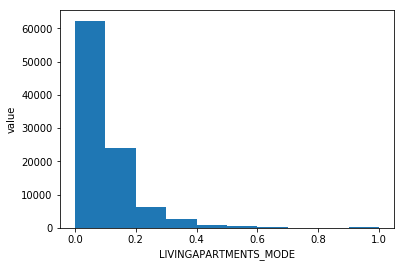

Column: LIVINGAPARTMENTS_MODE from Min: 0, Max: 1


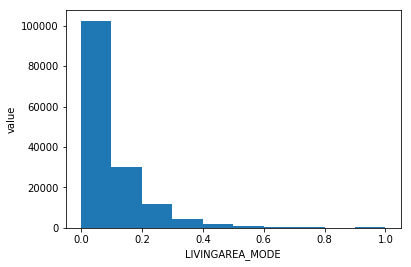

Column: LIVINGAREA_MODE from Min: 0, Max: 1


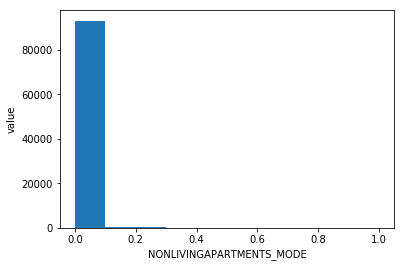

Column: NONLIVINGAPARTMENTS_MODE from Min: 0, Max: 1


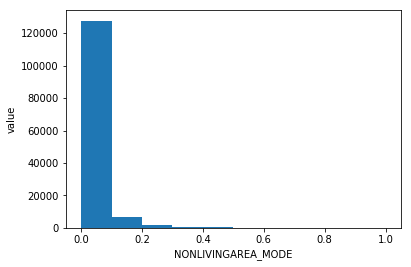

Column: NONLIVINGAREA_MODE from Min: 0, Max: 1


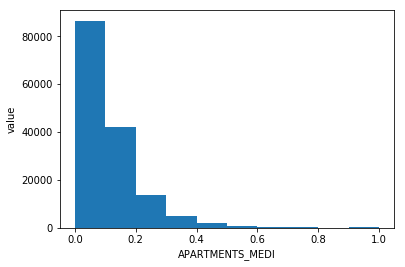

Column: APARTMENTS_MEDI from Min: 0, Max: 1


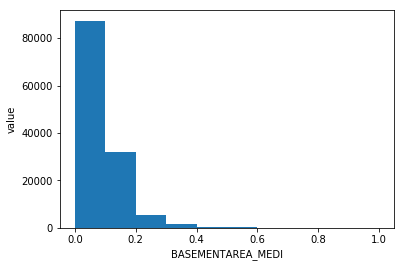

Column: BASEMENTAREA_MEDI from Min: 0, Max: 1


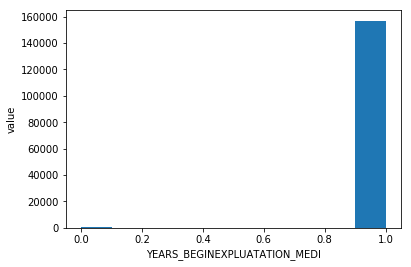

Column: YEARS_BEGINEXPLUATATION_MEDI from Min: 0, Max: 1


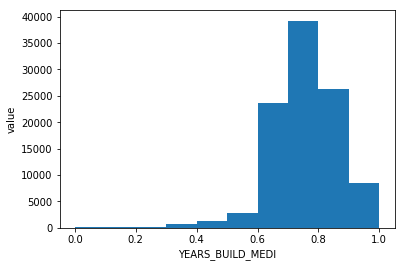

Column: YEARS_BUILD_MEDI from Min: 0, Max: 1


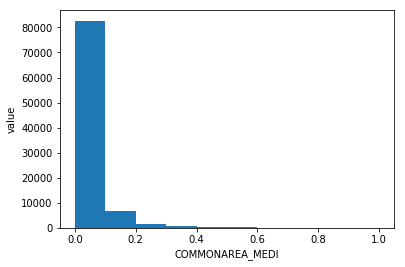

Column: COMMONAREA_MEDI from Min: 0, Max: 1


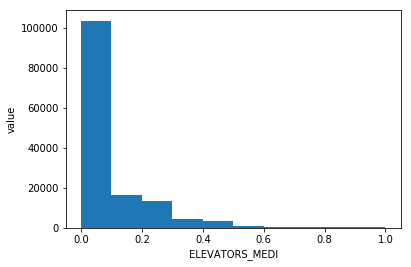

Column: ELEVATORS_MEDI from Min: 0, Max: 1


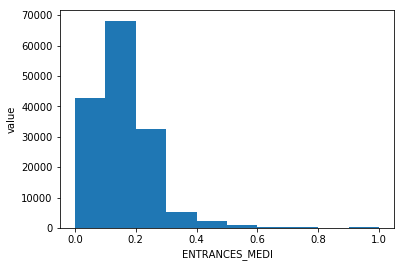

Column: ENTRANCES_MEDI from Min: 0, Max: 1


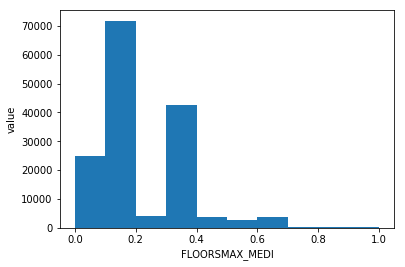

Column: FLOORSMAX_MEDI from Min: 0, Max: 1


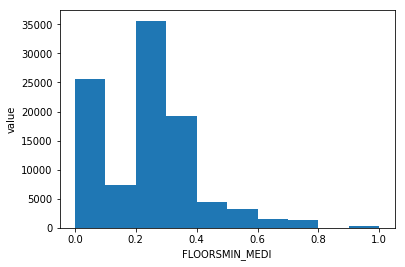

Column: FLOORSMIN_MEDI from Min: 0, Max: 1


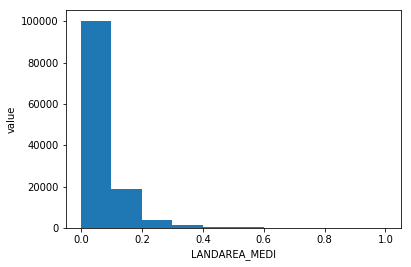

Column: LANDAREA_MEDI from Min: 0, Max: 1


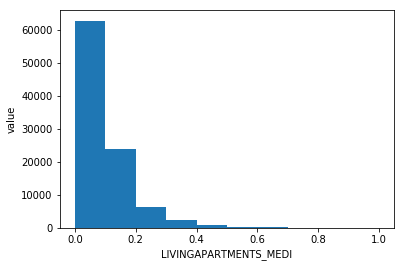

Column: LIVINGAPARTMENTS_MEDI from Min: 0, Max: 1


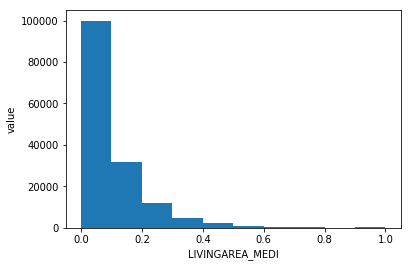

Column: LIVINGAREA_MEDI from Min: 0, Max: 1


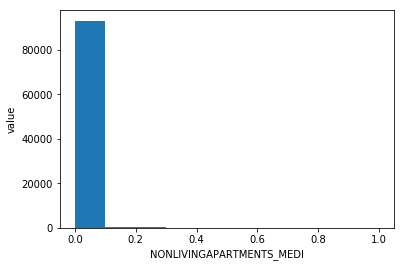

Column: NONLIVINGAPARTMENTS_MEDI from Min: 0, Max: 1


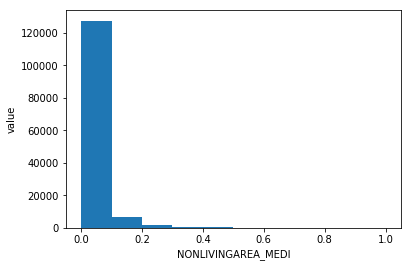

Column: NONLIVINGAREA_MEDI from Min: 0, Max: 1


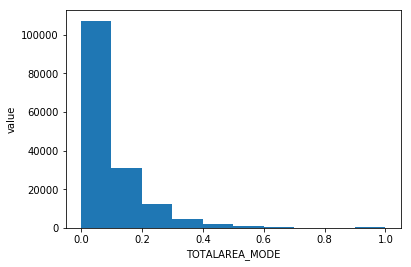

Column: TOTALAREA_MODE from Min: 0, Max: 1


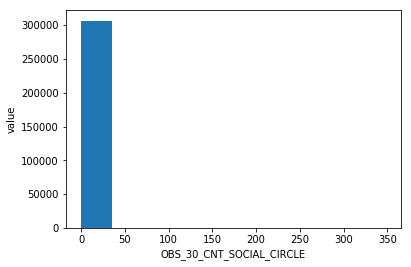

Column: OBS_30_CNT_SOCIAL_CIRCLE from Min: 0, Max: 348


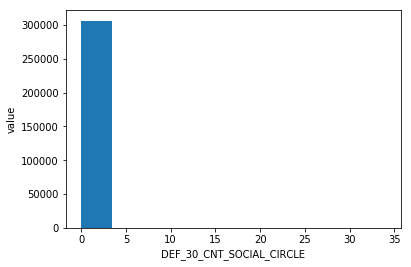

Column: DEF_30_CNT_SOCIAL_CIRCLE from Min: 0, Max: 34


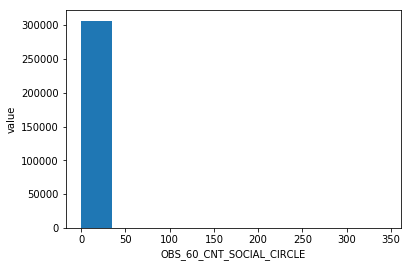

Column: OBS_60_CNT_SOCIAL_CIRCLE from Min: 0, Max: 344


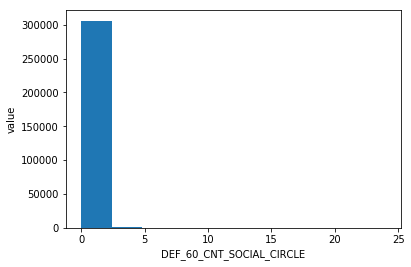

Column: DEF_60_CNT_SOCIAL_CIRCLE from Min: 0, Max: 24


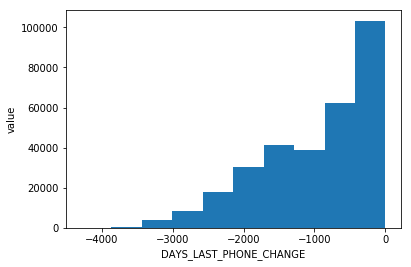

Column: DAYS_LAST_PHONE_CHANGE from Min: -4292, Max: 0


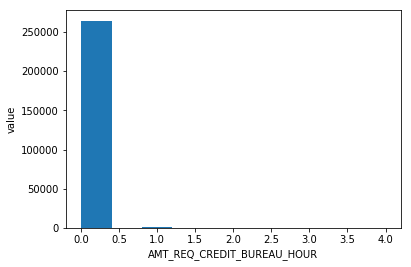

Column: AMT_REQ_CREDIT_BUREAU_HOUR from Min: 0, Max: 4


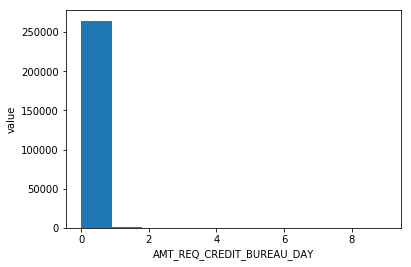

Column: AMT_REQ_CREDIT_BUREAU_DAY from Min: 0, Max: 9


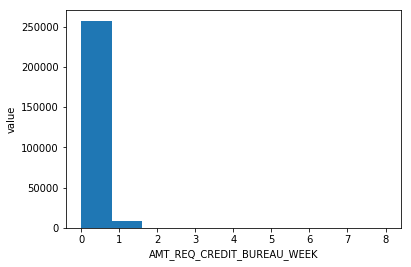

Column: AMT_REQ_CREDIT_BUREAU_WEEK from Min: 0, Max: 8


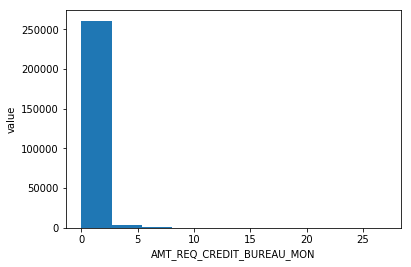

Column: AMT_REQ_CREDIT_BUREAU_MON from Min: 0, Max: 27


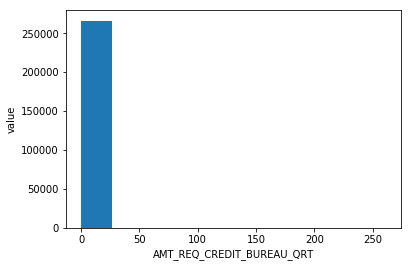

Column: AMT_REQ_CREDIT_BUREAU_QRT from Min: 0, Max: 261


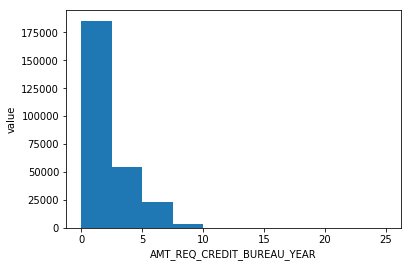

Column: AMT_REQ_CREDIT_BUREAU_YEAR from Min: 0, Max: 25


In [55]:
# 檢視這些欄位的數值範圍
for col in numeric_columns:
    print("The range of column %s is from %1.f to %1.f , and its data type is %s" % (col, app_train[col].min(), app_train[col].max(), app_train[col].dtype))
          
    plt.hist(app_train[col])
    plt.xlabel(col)
    plt.ylabel('value')
    plt.show()
    print("Column: %s from Min: %1.f, Max: %1.f" % (col, app_train[col].min(), app_train[col].max()))

    #app_train[col].plot.hist(title = 'title1')


In [14]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# from Min: 25650, Max: 117000000，數值落差很大

# REGION_POPULATION_RELATIVE 
# 圖表中，population_relative0.04~0.06、0.06~0.08與其他資料相比落在異常範圍

# OBS_60_CNT_SOCIAL_CIRCLE
# 從圖表顯示大部分值落在0~50之間，因此最大數344顯得差異很大

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


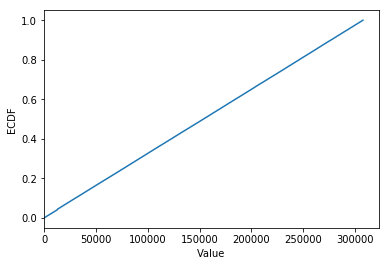

C:\Users\adchen0428\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


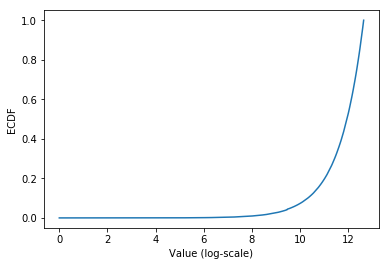

In [57]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""
cdf = np.cumsum(app_train['AMT_INCOME_TOTAL'])

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


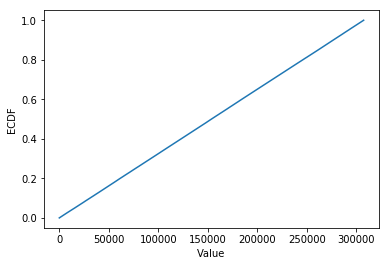

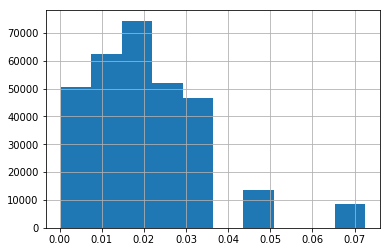

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [59]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
cdf = np.cumsum(app_train['REGION_POPULATION_RELATIVE'])



plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


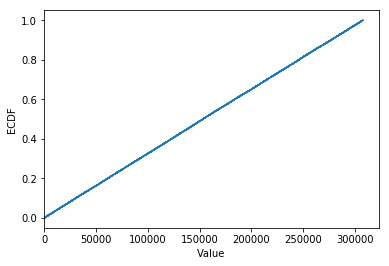

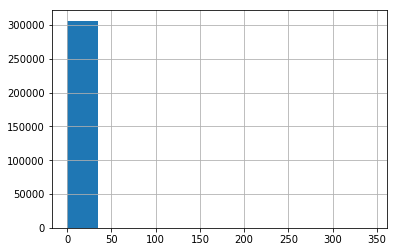

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [61]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

"""
cdf = np.cumsum(app_train['OBS_60_CNT_SOCIAL_CIRCLE'])


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [64]:
?app_train.loc

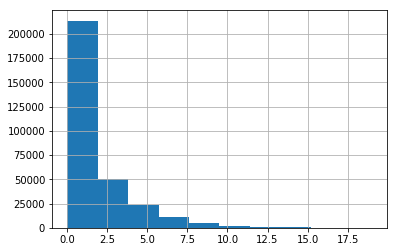

In [66]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_a = app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'

app_train.loc[loc_a, loc_b].hist()
plt.show()